In [1]:
import splitfolders
import cv2 ##pip pip install opencv-python
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

from PIL import Image
from tensorflow.keras.models import load_model

from keras.preprocessing import image

from keras.preprocessing.image import ImageDataGenerator #pip install keras, pip install tensorflow, pip install scipy#
from keras.models import Sequential
from keras.layers import Activation,Dropout,Conv2D,MaxPooling2D,Flatten,Dense,BatchNormalization

splitfolders.ratio("raw",output='raw_splitted',ratio=(0.8,0.1,0.1))

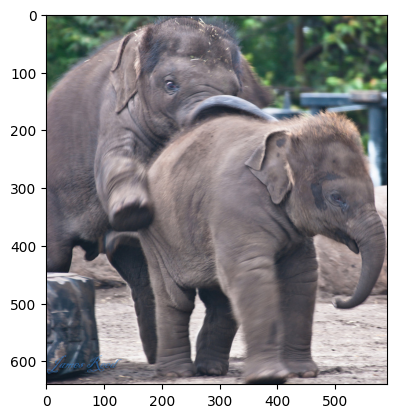

In [2]:
image = cv2.imread('raw_splitted/train/elephant/001.jpg')
if image is None:
    print("Error: Image not loaded.")
else:
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB) # converting to RGB 
    plt.imshow(image) 

In [3]:
image.shape

(640, 591, 3)

In [4]:
def normalize_image(image):
    # Convert the image to floating point
    image_float = image.astype(np.float32)
    
    # Normalize the image
    normalized_image = cv2.normalize(image_float, None, 0, 1, cv2.NORM_MINMAX)
    
    return normalized_image

In [5]:
normalize_image(image)

array([[[0.41960788, 0.53333336, 0.454902  ],
        [0.41960788, 0.54509807, 0.46274513],
        [0.41960788, 0.5568628 , 0.47058827],
        ...,
        [0.5647059 , 0.73333335, 0.454902  ],
        [0.5686275 , 0.72156864, 0.45882356],
        [0.5686275 , 0.70980394, 0.45882356]],

       [[0.40000004, 0.5058824 , 0.43137258],
        [0.40784317, 0.52156866, 0.4431373 ],
        [0.40784317, 0.53333336, 0.45098042],
        ...,
        [0.54509807, 0.7019608 , 0.454902  ],
        [0.5411765 , 0.6901961 , 0.45882356],
        [0.5411765 , 0.6784314 , 0.45882356]],

       [[0.38823533, 0.4784314 , 0.40784317],
        [0.3921569 , 0.4901961 , 0.4156863 ],
        [0.3921569 , 0.49803925, 0.42352945],
        ...,
        [0.5372549 , 0.69411767, 0.45098042],
        [0.5294118 , 0.6862745 , 0.45098042],
        [0.5254902 , 0.6745098 , 0.45098042]],

       ...,

       [[0.18431373, 0.17254902, 0.2392157 ],
        [0.19215688, 0.1764706 , 0.24313727],
        [0.18823531, 0

In [6]:
image_gen = ImageDataGenerator(  
    rotation_range=20,# specifies the rotation to be 20% 
    width_shift_range=0.1, # specifies the width shift of 10% 
    height_shift_range=0.1,# specifies the height shift of 10% 
    shear_range=0.20, # crops part of the image  
    zoom_range=0.20, # #zooms the image by 20% 
    fill_mode='nearest', # fills using the nearest pixel  
    horizontal_flip=True, # Secifies the horizontal flip  
    rescale=1/255 # scales the image  
) 

In [7]:
train_generator=image_gen.flow_from_directory(
 directory='raw_splitted/train', # specify the path to the directory
 target_size=(256,256), # specifies the dimension to resize the im
 )

test_generator=image_gen.flow_from_directory(
 directory='raw_splitted/test', # specify the path to the directory
 target_size=(256,256), # specifies the dimension to resize the im
 )

val_generator=image_gen.flow_from_directory(
 directory='raw_splitted/val', # specify the path to the directory
 target_size=(256,256), # specifies the dimension to resize the im
 )

Found 1859 images belonging to 10 classes.
Found 246 images belonging to 10 classes.
Found 203 images belonging to 10 classes.


In [8]:
labels = train_generator.class_indices
labels

{'buffalo': 0,
 'cheetah': 1,
 'elephant': 2,
 'fox': 3,
 'jaguar': 4,
 'leopard': 5,
 'lion': 6,
 'panda': 7,
 'rhino': 8,
 'zebra': 9}

In [9]:
classes=list(labels.keys())
classes

['buffalo',
 'cheetah',
 'elephant',
 'fox',
 'jaguar',
 'leopard',
 'lion',
 'panda',
 'rhino',
 'zebra']

In [10]:
train_label = train_generator.classes
test_label = test_generator.classes
val_label = val_generator.classes

In [11]:
train_label

array([0, 0, 0, ..., 9, 9, 9])

In [12]:
combined_label = np.concatenate((train_label, test_label,val_label))
combined_label

array([0, 0, 0, ..., 9, 9, 9])

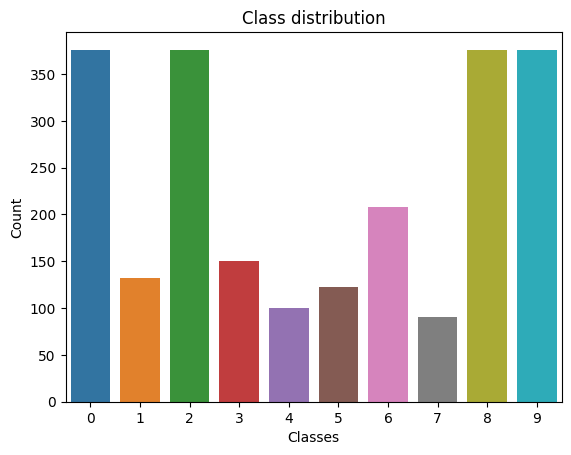

In [13]:
sns.countplot(x=combined_label)

# Adding labels and title
plt.xlabel("Classes")
plt.ylabel("Count")
plt.title("Class distribution")

# Show the plot
plt.show()

# train yolo

In [14]:
%cd darknet/
!make

C:\Users\chris\Documents\jupyter\hamoye\capstone\darknet


'make' is not recognized as an internal or external command,
operable program or batch file.


In [15]:
! ./darknet detector train '/animals-1/data.yaml' '/darknet/cfg/yolov3_custom.cfg' '/darknet/darknet53.conv.74'

'.' is not recognized as an internal or external command,
operable program or batch file.
